In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import table
import dataframe_image as dfi

In [2]:
df=pd.read_csv('FIFA23_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [3]:
print(df.columns.tolist())

['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'Kit Number', 'Best Overall Rating']


In [4]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64

In [5]:
# Fill missing values in 'Best Overall Rating' with 0
df['Best Overall Rating'].fillna(0, inplace=True)

# Convert 'Joined' to datetime format
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')

# Convert 'Height' and 'Weight' to float, removing 'cm' and 'kg'
df['Height'] = df['Height'].astype(str).str.replace('cm', '').astype(float)
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '').astype(float)

# Function to convert 'Release Clause' to float
def convert_release_clause(value):
    if pd.isnull(value):
        return None
    if 'M' in value:
        return float(value.replace('€', '').replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('€', '').replace('K', '')) * 1e3
    return float(value)

df['Release Clause'] = df['Release Clause'].apply(convert_release_clause)

# Drop unnecessary columns
df.drop(columns=['Photo', 'Flag', 'Club Logo'], inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display the cleaned data
print(df.head())


       ID             Name  Age Nationality  Overall  Potential  \
0  209658      L. Goretzka   27     Germany       87         88   
1  212198  Bruno Fernandes   27    Portugal       86         87   
2  224334         M. Acuña   30   Argentina       85         85   
3  192985     K. De Bruyne   31     Belgium       91         91   
4  224232       N. Barella   25       Italy       86         89   

                Club    Value   Wage  Special  ... Real Face  \
0  FC Bayern München     €91M  €115K     2312  ...       Yes   
1  Manchester United   €78.5M  €190K     2305  ...       Yes   
2         Sevilla FC   €46.5M   €46K     2303  ...        No   
3    Manchester City  €107.5M  €350K     2303  ...       Yes   
4              Inter   €89.5M  €110K     2296  ...       Yes   

                      Position     Joined  Loaned From Contract Valid Until  \
0  <span class="pos pos28">SUB 2018-07-01          NaN                 2026   
1  <span class="pos pos15">LCM 2020-01-30          NaN

In [6]:
df.fillna(0, inplace = True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,2312,...,Yes,"<span class=""pos pos28"">SUB",2018-07-01 00:00:00,0,2026,189.0,82.0,157000000.0,8.0,0
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,2305,...,Yes,"<span class=""pos pos15"">LCM",2020-01-30 00:00:00,0,2026,179.0,69.0,155000000.0,8.0,0
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,2303,...,No,"<span class=""pos pos7"">LB",2020-09-14 00:00:00,0,2024,172.0,69.0,97700000.0,19.0,0
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,2303,...,Yes,"<span class=""pos pos13"">RCM",2015-08-30 00:00:00,0,2025,181.0,70.0,198900000.0,17.0,0
4,224232,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,2296,...,Yes,"<span class=""pos pos13"">RCM",2020-09-01 00:00:00,0,2026,172.0,68.0,154400000.0,23.0,0


In [7]:
df.shape

(17660, 26)

In [8]:
stats = df.describe().round(2)
stats

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Release Clause,Kit Number
count,17660.00,17660.00,17660.00,17660.00,17660.00,17660.00,17660.00,17660.00,17660.00,17660.00,1.766000e+04,17660.00
mean,246319.42,23.13,63.37,70.98,1537.92,1.11,2.90,2.30,180.89,74.33,5.025864e+06,24.99
std,31487.89,4.64,8.04,6.53,285.89,0.41,0.66,0.75,6.96,6.98,1.509508e+07,19.17
min,16.00,15.00,43.00,42.00,749.00,1.00,1.00,1.00,149.00,48.00,0.000000e+00,0.00
25%,240732.50,20.00,58.00,67.00,1387.00,1.00,3.00,2.00,176.00,70.00,4.980000e+05,11.00
50%,257041.00,22.00,63.00,71.00,1548.00,1.00,3.00,2.00,181.00,74.00,1.200000e+06,22.00
75%,263027.50,26.00,69.00,75.00,1727.00,1.00,3.00,3.00,186.00,79.00,3.025000e+06,32.00
max,271340.00,54.00,91.00,95.00,2312.00,5.00,5.00,5.00,206.00,110.00,3.667000e+08,99.00


In [9]:
dfi.export(stats, 'tableA.png', dpi=300)

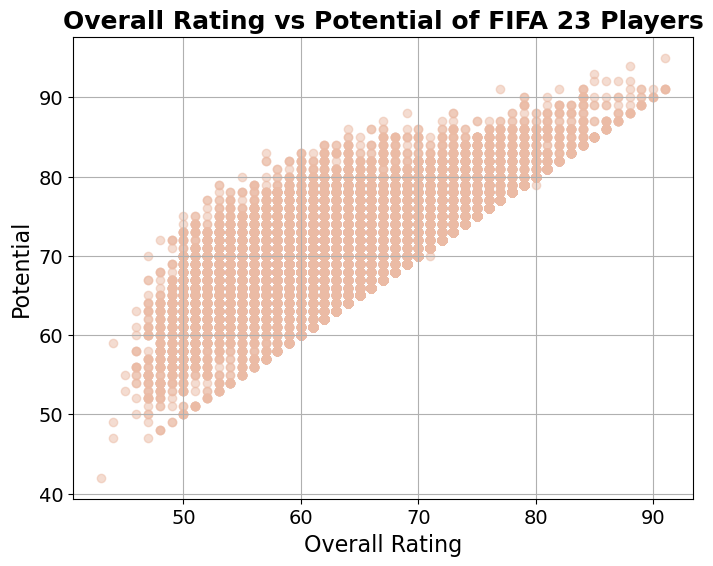

In [10]:
# Prepare data for the scatter plot (Overall vs Potential)
overall = df['Overall']
potential = df['Potential']

# Create the scatter plot for Overall vs Potential
plt.figure(figsize=(8, 6))
plt.scatter(overall, potential, alpha=0.5, color= '#EBBBA5')
plt.title('Overall Rating vs Potential of FIFA 23 Players', fontsize=18,fontweight='bold' )
plt.xlabel('Overall Rating', fontsize=16)
plt.ylabel('Potential', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

In [11]:
df['Preferred Foot'].value_counts()

Preferred Foot
Right    13651
Left      4009
Name: count, dtype: int64

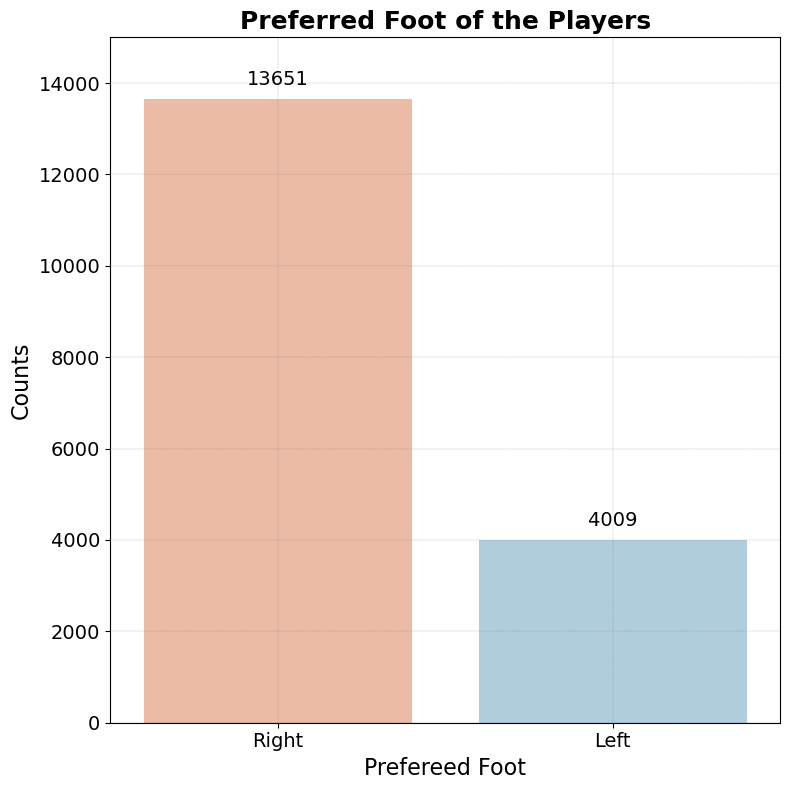

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the size to give your plot more room
graph = sns.countplot(ax=ax, x='Preferred Foot', data=df, palette='RdBu') 
graph.set_title('Preferred Foot of the Players', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.2, color='gray')

# Adding data labels
for p in graph.patches:
    height = p.get_height()
    graph.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=14, color='black',
                   xytext=(0, 14), textcoords='offset points')

plt.xlabel('Prefereed Foot', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim([0, 15000])
plt.tight_layout()
plt.show()

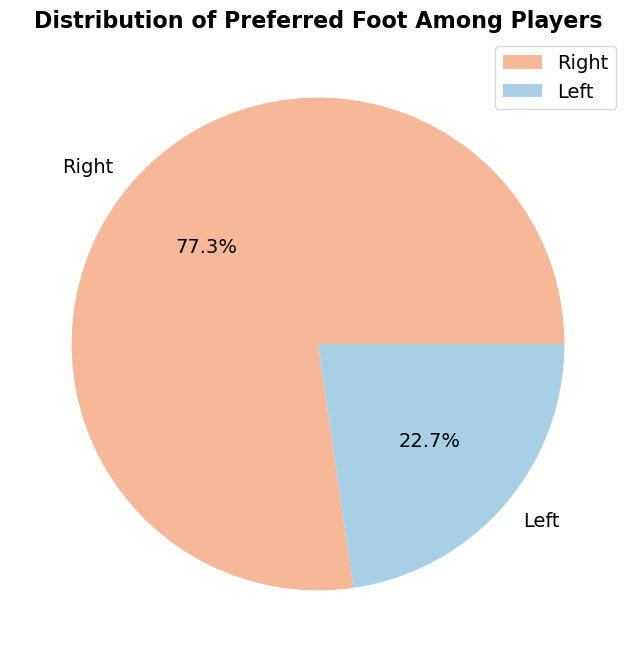

In [13]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
colors_rdbu = sns.color_palette("RdBu", n_colors=len(labels))
plt.pie(size, labels = labels, colors=colors_rdbu, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribution of Preferred Foot Among Players', fontsize = 16, fontweight='bold')
plt.legend(fontsize= 14)
plt.show()

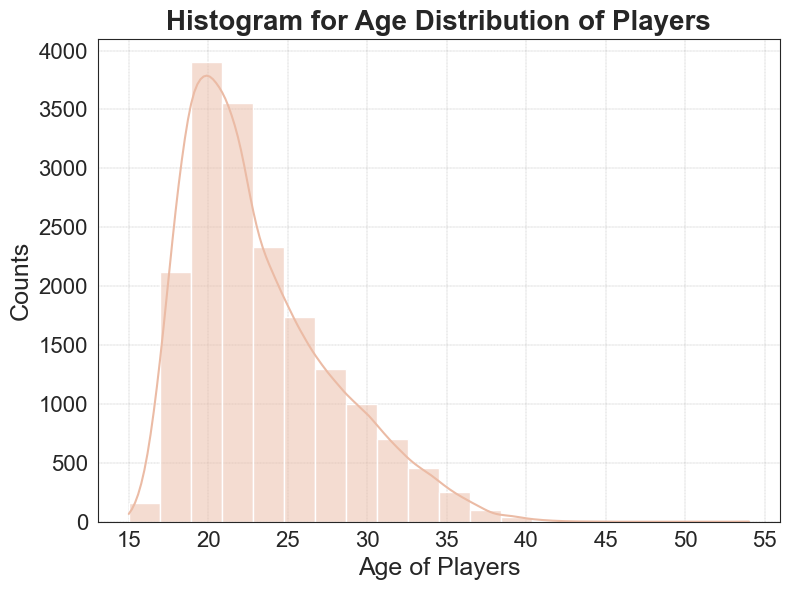

In [28]:
x = df['Age']
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('white')
ax = sns.histplot(x, bins = 20, kde = True, color='#EBBBA5') 
ax.set_title(label = 'Histogram for Age Distribution of Players', fontsize = 20, fontweight= 'bold')

plt.xlabel('Age of Players', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.2, color='gray')
plt.show()

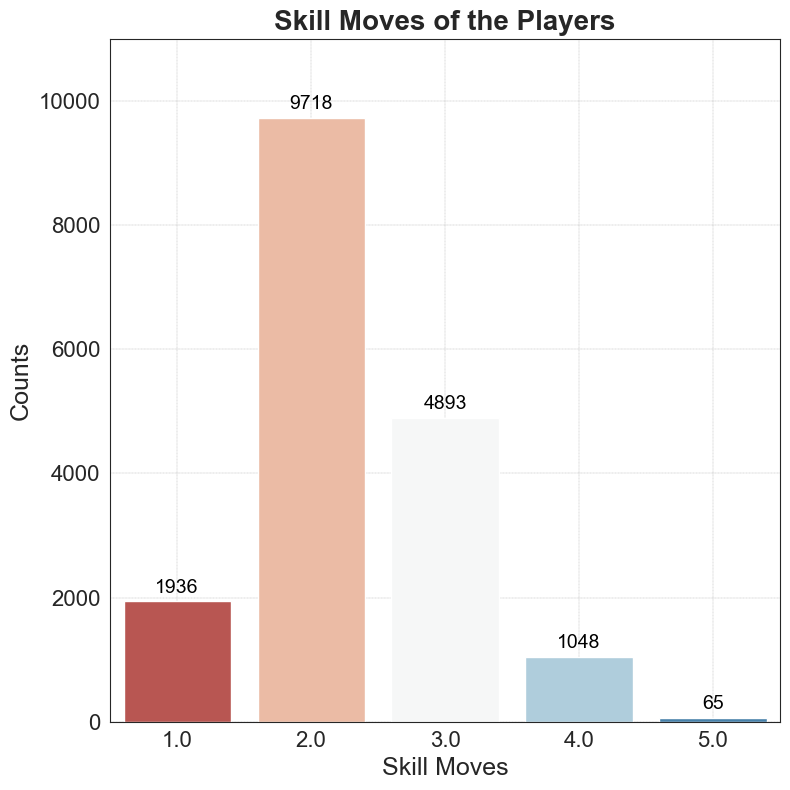

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
plt.grid(True, linestyle='--', linewidth=0.2, color='gray')
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'RdBu')
for p in graph.patches:
    height = p.get_height()
    graph.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=14, color='black',
                   xytext=(0, 10), textcoords='offset points')

ax.set_ylim([0, 11000])    

ax.set_title(label = 'Skill Moves of the Players', fontsize = 20, fontweight= 'bold')

plt.xlabel('Skill Moves', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.2, color='gray')
plt.show()

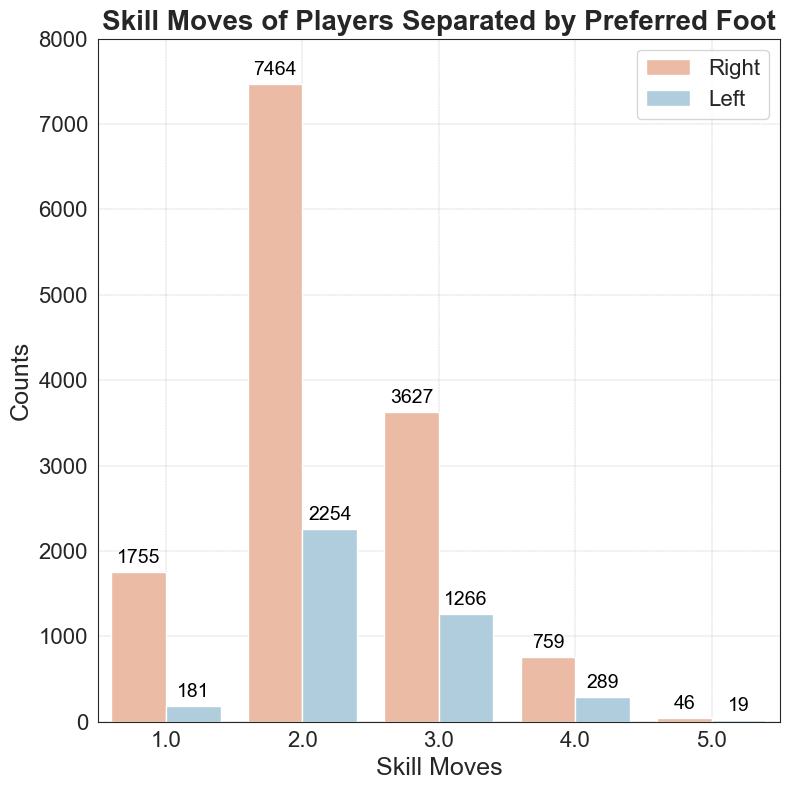

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
plt.grid(True, linestyle='--', linewidth=0.2, color='gray')
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'RdBu')
for p in graph.patches:
    height = p.get_height()
    graph.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=14, color='black',
                   xytext=(0, 10), textcoords='offset points')

ax.set_ylim([0, 8000])    

ax.set_title(label = 'Skill Moves of Players Separated by Preferred Foot', fontsize = 20, fontweight= 'bold')

plt.xlabel('Skill Moves', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.legend(fontsize= 16)
plt.grid(True, linestyle='--', linewidth=0.2, color='gray')
plt.show()


In [17]:
top_countries = df['Nationality'].value_counts().head(10)

top_countries

Nationality
England        1531
Germany        1038
Spain           990
France          864
Argentina       843
Brazil          539
Italy           517
Netherlands     455
Uruguay         417
Japan           378
Name: count, dtype: int64

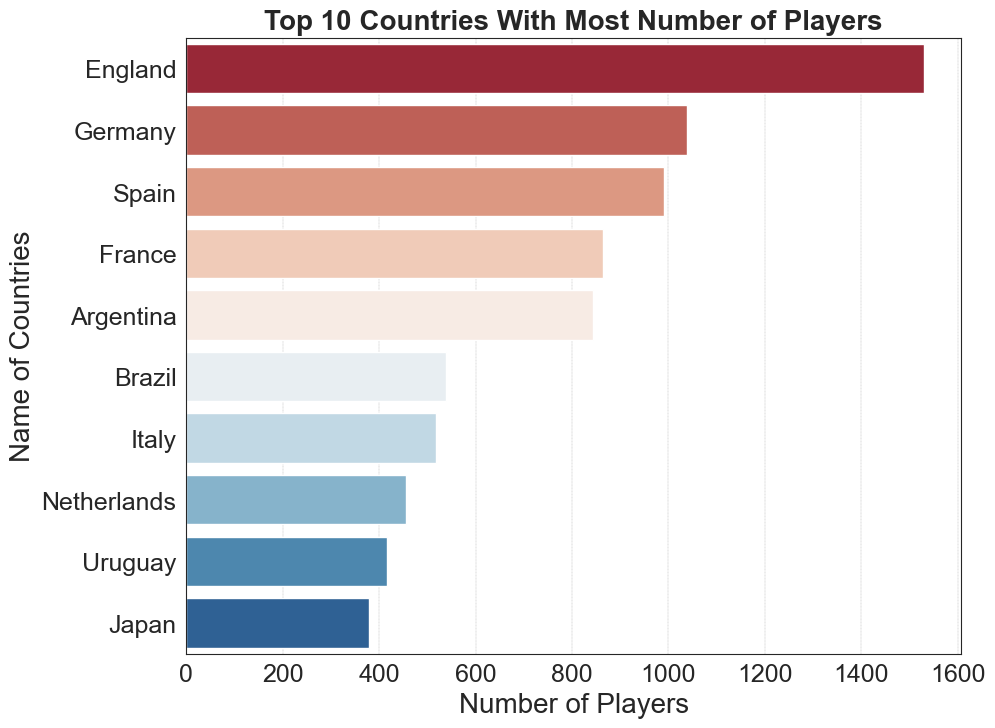

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(True, linestyle='--', linewidth=0.2, color='gray')
sns.barplot(y = top_countries.index, x = top_countries.values  , data = df, palette='RdBu')
ax.invert_yaxis()  # labels read top-to-bottom
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players', fontsize = 20)
ax.set_ylabel('Name of Countries', rotation=90, fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_title('Top 10 Countries With Most Number of Players', fontsize = 20, fontweight= 'bold')
plt.show()

In [19]:
top_countries_name = top_countries.index

top_countries_name

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy',
       'Netherlands', 'Uruguay', 'Japan'],
      dtype='object', name='Nationality')

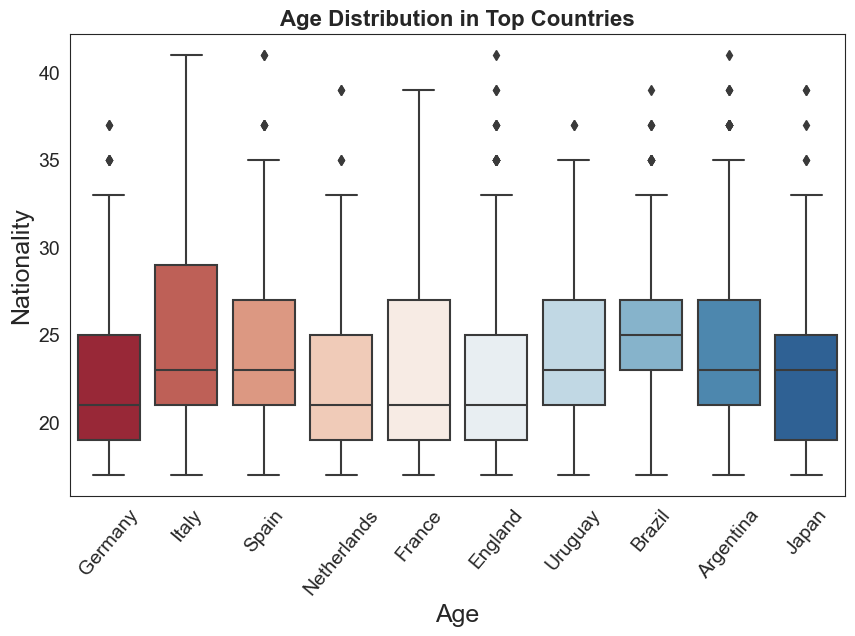

In [35]:


df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (10,6))
ax= sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='RdBu')
plt.title('Age Distribution in Top Countries', fontsize = 16, fontweight= 'bold')
ax.set_xlabel('Age', fontsize = 18)
ax.set_ylabel('Nationality', fontsize = 18)
plt.xticks(rotation = 50, fontsize=14)
plt.yticks(fontsize=14)
plt.show()



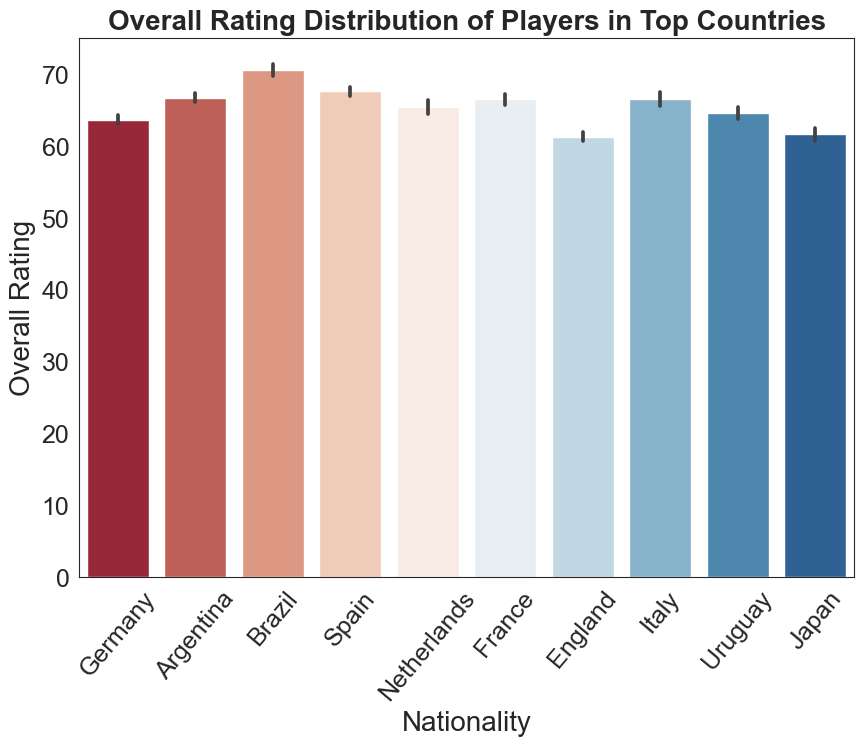

In [33]:
plt.figure(figsize = (10,7))
ax = sns.barplot(x='Nationality', y='Overall', data=df_country_rating, palette='RdBu')
ax.set_title('Overall Rating Distribution of Players in Top Countries', fontsize=20, fontweight='bold')
ax.set_xlabel('Nationality', fontsize=20)
ax.set_ylabel('Overall Rating', fontsize=20)
plt.xticks(rotation=50, fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [37]:
fifa_overall = df.sort_values(['Overall'],ascending=False)[:10] # TOP 10 PLAYERS WITH HIGHEST OVERALL
styled_table= fifa_overall[['Name','Overall','Potential','Club','Preferred Foot','Position', 'Nationality']].style.background_gradient(cmap='Blues')
styled_table

,Name,Overall,Potential,Club,Preferred Foot,Position,Nationality
41,R. Lewandowski,91,91,FC Barcelona,Right,ST,Poland
124,K. Benzema,91,91,Real Madrid CF,Right,CF,France
3,K. De Bruyne,91,91,Manchester City,Right,RCM,Belgium
56,L. Messi,91,91,Paris Saint-Germain,Left,RW,Argentina
75,K. Mbappé,91,95,Paris Saint-Germain,Right,ST,France
25,M. Salah,90,90,Liverpool,Left,RW,Egypt
14357,T. Courtois,90,91,Real Madrid CF,Left,GK,Belgium
100,Cristiano Ronaldo,90,90,Manchester United,Right,ST,Portugal
192,V. van Dijk,90,90,Liverpool,Right,LCB,Netherlands
9151,M. Neuer,90,90,FC Bayern München,Right,GK,Germany


In [38]:
dfi.export(styled_table, 'table1.png', dpi=300)

In [39]:
fifa_potential = df.sort_values(['Potential'], ascending=False)[:10] #TOP 10 PLAYERS WITH HIGHEST POTENTIAL
styled_potential = fifa_potential[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='Reds')
styled_potential

,Name,Overall,Potential,Club,Preferred Foot,Position
75,K. Mbappé,91,95,Paris Saint-Germain,Right,ST
180,E. Haaland,88,94,Manchester City,Left,ST
214,Pedri,85,93,FC Barcelona,Right,LCM
13506,G. Donnarumma,88,92,Paris Saint-Germain,Right,GK
317,P. Foden,85,92,Manchester City,Left,RW
17,F. de Jong,87,92,FC Barcelona,Right,RCM
849,Vinícius Jr.,86,92,Real Madrid CF,Right,LW
795,F. Wirtz,82,91,Bayer 04 Leverkusen,Right,SUB
12893,J. Oblak,89,91,Atlético de Madrid,Right,GK
70,J. Bellingham,84,91,Borussia Dortmund,Right,LDM


In [40]:
dfi.export(styled_potential, 'table2.png', dpi=300)

In [41]:
def normalizing_wage(x):
    if '€' in str(x) and 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000

    else:
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000

    return c

df['Normalized_Wage'] = df['Wage'].apply(lambda x : normalizing_wage(x))
df.sort_values(by = 'Normalized_Wage' , ascending = False)[['Name','Club','Nationality','Overall',
'Age','Normalized_Wage','Wage']].head(5)

,Name,Club,Nationality,Overall,Age,Normalized_Wage,Wage
10914,B. Traore,BK Häcken,Côte d'Ivoire,62,19,950000.0,€950
13104,T. Ku-DiPietro,D.C. United,United States,54,20,950000.0,€950
8998,22 A. Hrosu,Górnik Zabrze,Ukraine,54,20,950000.0,€950
17079,22 P. Bos,SC Cambuur,Netherlands,61,24,950000.0,€950
14019,Pi Ziyang,Wuhan FC,China PR,47,19,950000.0,€950


In [42]:
top_normalized_wages = df.sort_values(by='Normalized_Wage', ascending=False)[['Name', 'Club', 'Nationality', 'Overall', 'Age', 'Normalized_Wage', 'Wage']].head(5)
dfi.export(top_normalized_wages, 'table3.png', dpi=300)

In [43]:
youngest_players=df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head(5) # youngest players
youngest_players

,Name,Club,Nationality,Overall,Age
17636,22 D. Oncescu,FC Dinamo 1948 Bucureşti,Romania,50,15
13712,E. Topcu,Drogheda United,Republic of Ireland,48,16
13078,22 R. van den Berg,PEC Zwolle,Netherlands,60,16
11257,22 Y. Koré,Paris FC,France,59,16
11278,21 H. Kumagai,Vegalta Sendai,Japan,52,16


In [44]:
dfi.export(youngest_players, 'table4.png', dpi=300)

In [45]:
eldest_players= df.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head(5) # eldest players
eldest_players

,Name,Club,Nationality,Overall,Age
15272,22 K. Miura,Yokohama FC,Japan,56,54
15375,G. Buffon,Parma,Italy,79,44
17257,17 D. Andersson,Helsingborgs IF,Sweden,57,43
16036,S. Torrico,San Lorenzo de Almagro,Argentina,72,42
16311,21 L. Fernández,Sociedad Deportiva Aucas,Colombia,61,42


In [46]:
dfi.export(eldest_players, 'table5.png', dpi=300)